In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
rbs = pd.read_csv('../Capstone_csv_file/rbs_att_salary_18-19')

In [3]:
rbs.dtypes

NAME         object
ATT           int64
ATT_rank    float64
salary        int64
dtype: object

In [4]:
rbs.head()

,NAME,ATT,ATT_rank,salary
0,Ezekiel Elliott,304,1.0,6239085
1,Saquon Barkley,261,2.0,7798688
2,David Johnson,258,3.0,13000000
3,Todd Gurley,256,4.0,14375000
4,Adrian Peterson,251,5.0,1015000


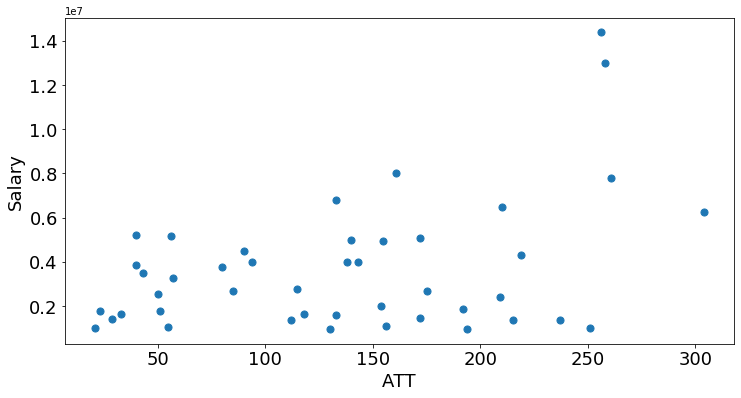

In [5]:
ax = rbs.plot(kind="scatter", x = 'ATT',  y = 'salary', figsize = (12,6), s = 50)
plt.xlabel('ATT', fontsize=18)
plt.ylabel("Salary", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [6]:
ss = StandardScaler()
X = ss.fit_transform(rbs.loc[:, ['ATT', 'salary']])

In [7]:
X.mean(axis = 0)

array([-1.51394049e-16,  4.03717464e-17])

In [8]:
X.std(axis = 0)

array([1., 1.])

In [9]:
km = KMeans(n_clusters = 5, random_state = 27)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=27, tol=0.0001, verbose=0)

In [10]:
km.cluster_centers_

array([[-1.04038526, -0.2542633 ],
       [ 0.17680382,  0.59367944],
       [ 1.60339819,  3.43833696],
       [ 1.49126825,  0.87147318],
       [ 0.51978952, -0.72827477]])

In [11]:
km.predict(X)

array([3, 3, 2, 2, 4, 4, 3, 4, 3, 4, 4, 4, 4, 1, 4, 1, 4, 1, 4, 1, 1, 1,
       1, 4, 4, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [12]:
rbs['clusters'] = km.labels_
rbs.head()

,NAME,ATT,ATT_rank,salary,clusters
0,Ezekiel Elliott,304,1.0,6239085,3
1,Saquon Barkley,261,2.0,7798688,3
2,David Johnson,258,3.0,13000000,2
3,Todd Gurley,256,4.0,14375000,2
4,Adrian Peterson,251,5.0,1015000,4


In [13]:
ss.inverse_transform(km.cluster_centers_)

array([[5.65882353e+01, 2.93354335e+06],
       [1.48857143e+02, 5.40300629e+06],
       [2.57000000e+02, 1.36875000e+07],
       [2.48500000e+02, 6.21202475e+06],
       [1.74857143e+02, 1.55308014e+06]])

In [14]:
rbs.groupby('clusters')[['ATT', 'salary']].mean()

,ATT,salary
clusters,,
0,56.588235,2.933543e+06
1,148.857143,5.403006e+06
2,257.000000,1.368750e+07
3,248.500000,6.212025e+06
4,174.857143,1.553080e+06


In [15]:
centroids = rbs.groupby('clusters')[['ATT', 'salary']].mean()

<Figure size 504x504 with 0 Axes>

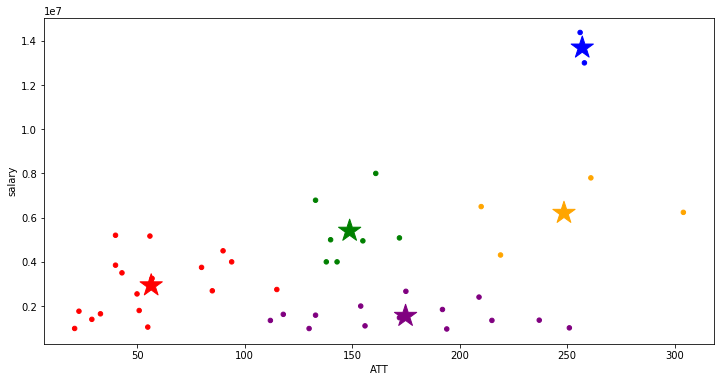

In [16]:
plt.figure(figsize = (7,7));

colors = ['red', 'green', 'blue', 'orange', 'purple']
rbs['color'] = rbs['clusters'].map(lambda p: colors[p])

ax = rbs.plot(    
    kind = 'scatter', 
    x = 'ATT', y = 'salary',
    figsize = (12,6),
    c = rbs['color']
);

centroids.plot(
    kind = 'scatter', 
    x = 'ATT', y = 'salary', 
    marker = '*', c = colors, s = 550,
    ax = ax
);

In [17]:
km.inertia_

13.886730188227123

In [18]:
silhouette_score(X, km.labels_)

0.452179874445094